# Task 1
import dataset (with pandas)

In [2]:
import pandas as pd

In [3]:
# import the dataset
base='mammographic_masses_data.csv'
mydata = pd.read_csv(base)
# make dataset in pandas DataFrame
df = pd.DataFrame(data=mydata)
# display the first 5 row of the dataset
df.head()

,BA,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


# Task 2 
dataset with summary statistics and visualizations

## 2.1 initial look
get the summary statistics of every variable.
<https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html>

In [4]:
# get the information of every columns
# it will count the non-null data of each variables
## ->　if the count are not the same, meaning some value missing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BA        959 non-null    float64
 1   Age       956 non-null    float64
 2   Shape     930 non-null    float64
 3   Margin    913 non-null    float64
 4   Density   885 non-null    float64
 5   Severity  961 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 45.2 KB


In [5]:
# descriptive statistics summary
# shows mean, median, standard deviation, minumum value, maximum value, 1st 2nd and 3rd quantile
# excluding NaN values
summary = df.describe(include='all')
print(summary)

               BA         Age       Shape      Margin     Density    Severity
count  959.000000  956.000000  930.000000  913.000000  885.000000  961.000000
mean     4.300313   55.487448    2.721505    2.796276    2.910734    0.463059
std      0.683469   14.480131    1.242792    1.566546    0.380444    0.498893
min      0.000000   18.000000    1.000000    1.000000    1.000000    0.000000
25%      4.000000   45.000000    2.000000    1.000000    3.000000    0.000000
50%      4.000000   57.000000    3.000000    3.000000    3.000000    0.000000
75%      5.000000   66.000000    4.000000    4.000000    3.000000    1.000000
max      6.000000   96.000000    4.000000    5.000000    4.000000    1.000000


## 2.2 loc function

In [6]:
# all the data where the severity is 1.
df.loc[mydata['Severity']==1]

,BA,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
4,5.0,74.0,1.0,5.0,NaN,1
8,5.0,57.0,1.0,5.0,3.0,1
...,...,...,...,...,...,...
951,5.0,67.0,4.0,5.0,3.0,1
952,4.0,68.0,4.0,4.0,3.0,1
955,4.0,52.0,4.0,4.0,3.0,1
957,4.0,56.0,4.0,5.0,3.0,1


In [7]:
# the margin attribute of every instance of the data where the severity is 1.
df.loc[mydata['Severity']==1, 'Margin']
## other method: 
## Sev1=mydata.loc[mydata["Severity"]==1]
## print(Sev1["Margin"])

0      5.0
1      1.0
2      5.0
4      5.0
8      5.0
      ... 
951    5.0
952    4.0
955    4.0
957    5.0
959    5.0
Name: Margin, Length: 445, dtype: float64

## 2.3 three visualization

In [8]:
import plotly
import matplotlib.pyplot as plt

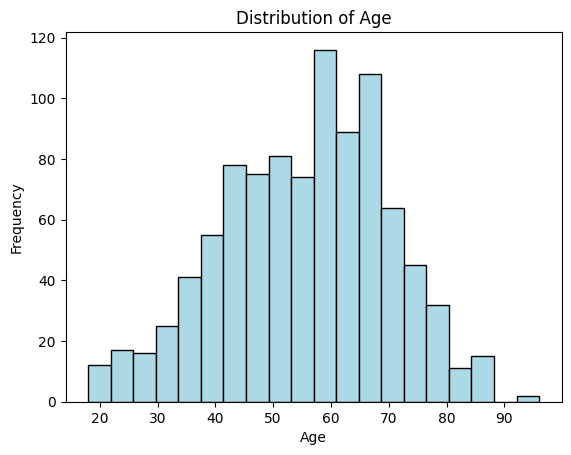

In [9]:
# first visualization, distribution plots, frequency of the variable
# show the frequency of the certain variable
plt.hist(df['Age'], bins=20,  color='lightblue',  edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

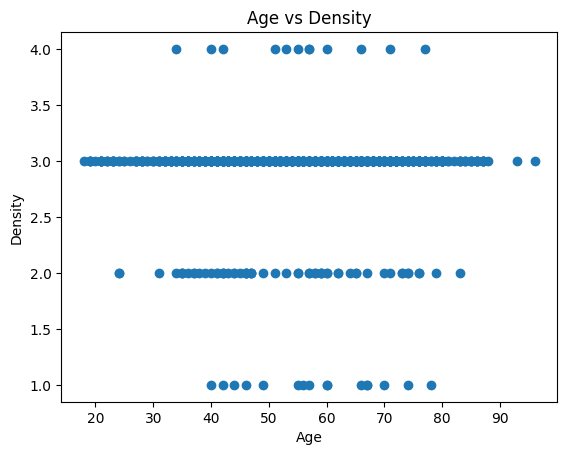

In [10]:
# second visualization, scatterplots
# show the relationship between two varibles
## it could also show the distribution of the certain variables
x = df['Age']
y = df['Density']
plot  = plt.scatter(x, y)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age vs Density')
plt.show()

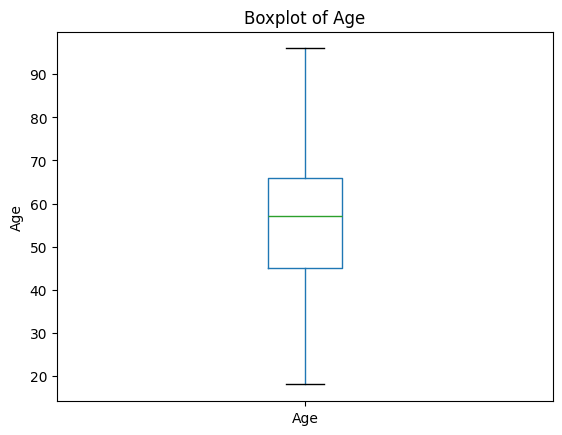

In [11]:
# third visualization, boxplot
# show the statistics value of the (selected) variable age
# df.boxplot(grid=False)
df.boxplot(column=['Age'], grid=False)
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

In [12]:
# fourth visualizeation, scatterplot
# Scatterplot between age and BA level, with color representing Severity level
import plotly.express as px
ageBA = px.scatter(df, x="Age", y="BA", color='Severity', title = 'BA level by Age')
ageBA.show()

In [13]:
# fifth visualization, heatmap
# show the correlation between shape and margin
shapemargin = px.density_heatmap(df, x="Shape", y="Margin", title='Shape/Margin Heatmap')
shapemargin

# Task 3
preprocessing with data transformation

## 3.1 data cleaning
Goal: clean the dataset from missing value  
Reason: from task2, we observe there are some missing value. To reducess data inaccuracy, aviod inconsistent predictions, and enhances data interpretability, we need to clean those data.  
Method: since there are many data point in this dataset, we delete the row (point) as long as there is missing value (NaN) present.  

In [14]:
# drop the row (axis=0) if any NA values are present
# the cleaned dataset called cleaned_df
df = df.copy()
cleaned_df = df.dropna(axis=0, how='any')
# present the differnt of cleaned dataset
cleaned_df.describe()
## observation1: all the variables have the same count
## observation2: summary statistics is difference from task2

,BA,Age,Shape,Margin,Density,Severity
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.338554,55.781928,2.781928,2.813253,2.915663,0.485542
std,0.660689,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,6.000000,96.000000,4.000000,5.000000,4.000000,1.000000


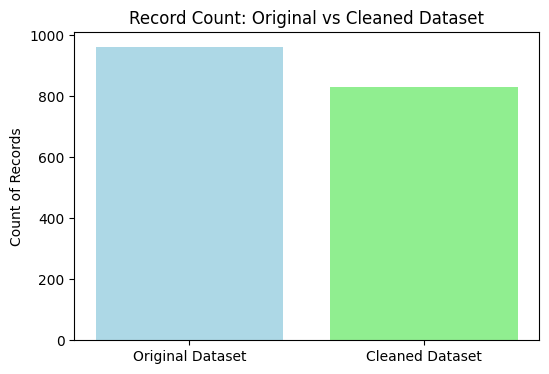

In [15]:
## visualize the change in count
# Bar plot of counts to compare original and cleaned dataset sizes
df_count = len(df)
cleaned_df_count = len(cleaned_df)

# Bar plot showing count comparison
plt.figure(figsize=(6, 4))
plt.bar(['Original Dataset', 'Cleaned Dataset'], 
        [df_count, cleaned_df_count], 
        color=['lightblue', 'lightgreen'])
plt.ylabel('Count of Records')
plt.title('Record Count: Original vs Cleaned Dataset')
plt.show()

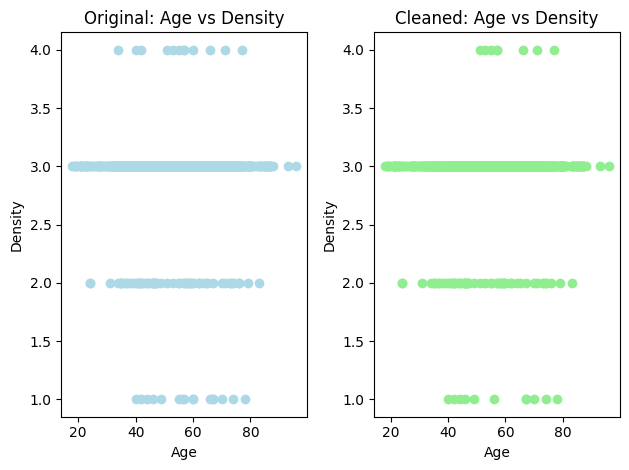

In [16]:
## visualize the removed point
# the orginial dataset, on the left
plt.subplot(1,2,1)  
plt.scatter(df['Age'], df['Density'], 
            color='lightblue',label='Original')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Original: Age vs Density')

# the cleaned dataset, on the right
plt.subplot(1, 2, 2)
plt.scatter(cleaned_df['Age'], cleaned_df['Density'], 
            color='lightgreen', label='Cleaned')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Cleaned: Age vs Density')

plt.tight_layout()
plt.show()

## 3.2 Normalization  
Normalization here makes sense before we feed the data to the computer, as machine learning functions can buidl models better 

In [17]:
# set the linear normalization function
def normalize(col = cleaned_df['Age']):
    reslut = col.copy()
    max_value = col.max()
    min_value = col.min()
    reslut = (col - min_value) / (max_value - min_value)
    return reslut
    
# apply the function to normalized the age variable
cleaned_df = cleaned_df.copy()
normalize_Age = normalize(col = cleaned_df['Age'])
print(normalize_Age)

## create another table that age is in normalized form
cleaned_normalize = cleaned_df.copy()
cleaned_normalize["Age"] = normalize_Age 

0      0.628205
2      0.512821
3      0.128205
8      0.500000
10     0.743590
         ...   
956    0.371795
957    0.487179
958    0.589744
959    0.615385
960    0.564103
Name: Age, Length: 830, dtype: float64


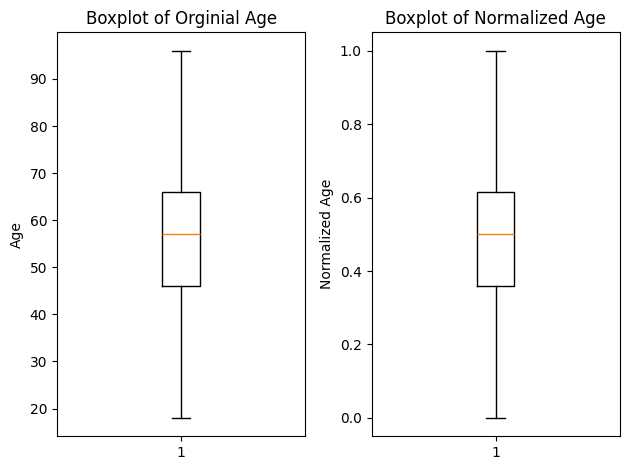

In [18]:
# only normanized the Age, range of Age become between 0-1
# orginal age on the left
plt.subplot(1,2,1) 
plt.boxplot(cleaned_df['Age'])
plt.title('Boxplot of Orginial Age')
plt.ylabel('Age')

# the normalized age on the right
plt.subplot(1,2,2) 
plt.boxplot(cleaned_normalize["Age"] )
plt.title('Boxplot of Normalized Age')
plt.ylabel('Normalized Age')

plt.tight_layout()
plt.show()

## The distribution of age does not change. The only difference is the range

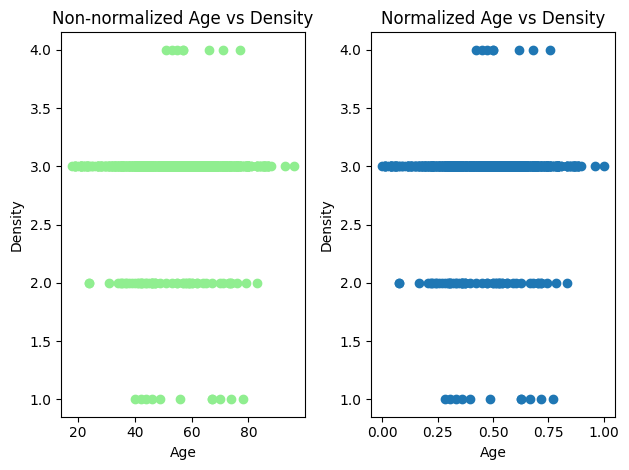

In [19]:
# visualize the distribution in 2-dimension
# left is the clean dataset, Age vs Density
plt.subplot(1,2,1)  
plt.scatter(cleaned_df['Age'], cleaned_df['Density'], 
            color='lightgreen', label='Cleaned')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Non-normalized Age vs Density')
# right is the clean dataset, normalized Age vs Density
plt.subplot(1,2,2) 
plot  = plt.scatter(cleaned_normalize["Age"] , cleaned_normalize['Density'])
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Normalized Age vs Density')

plt.tight_layout()
plt.show()

## the distribution do not change
## only different is the range of the age

# Task 4: Feature engineering

## 4.1 automatic feature

In [20]:
from sklearn.ensemble import RandomForestClassifier
#Let severity be the target variable
#Now we build a model for this purpose
X = df.drop('Severity', axis=1) 
y = df['Severity']

#Train Random Forest Model
RFmodel = RandomForestClassifier(n_estimators=100)
RFmodel.fit(X, y)

importances = RFmodel.feature_importances_

# Creating a DataFrame to hold the feature importances
feature_importances = pd.DataFrame(importances, index=X.columns, columns=['Importance'])

# print(feature_importances)

TreeFig = px.bar(
    feature_importances,
    x='Importance',
    y=feature_importances.index,
    title='Feature Importances to predict Severity',
    labels={'Importance': 'Importance Score', 'index': 'Features'},
    )

TreeFig.show()

   Feature  ANOVA F-Score
0       BA     358.512018
1      Age     216.427503
2    Shape     387.782271
3   Margin     407.908580
4  Density       3.920754


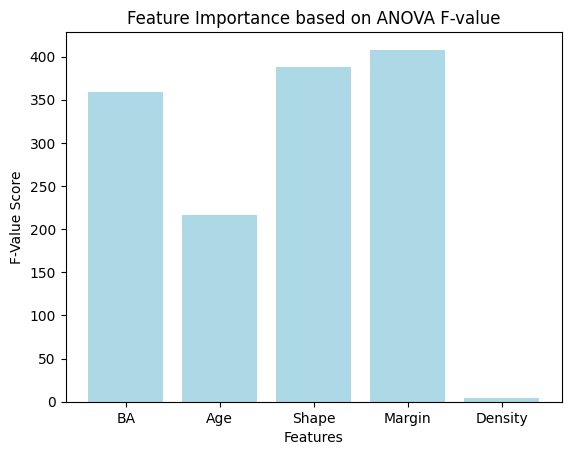

In [21]:
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
# Severity is the target variable, what we want to predict
# seperate the Severity column
X = cleaned_df.drop(columns=['Severity'])
y = cleaned_df['Severity']

# selectKBest select the best features based on the F-score
# k is the number of feature. k=5 is same as k='all', as there are 5 variable in X
# f_classif is the ANOVA F-value between label/feature for classification tasks.
selector = SelectKBest(score_func=f_classif, k='all')
X_new = selector.fit_transform(X, y)

# how much variance in the target variable can be explained by each feature,
# higher scores indicating a stronger relationship (more importance) for predicting the target.
feature_scores = selector.scores_
# store result in the dataframe
scores_table = pd.DataFrame({
    'Feature': X.columns,
    'ANOVA F-Score': feature_scores
})
print(scores_table)

# make the bar plot
features = X.columns
plt.bar(features, feature_scores, color='lightblue')
plt.title('Feature Importance based on ANOVA F-value')
plt.xlabel('Features')
plt.ylabel('F-Value Score')

plt.show()

## 4.2 PCA
Goal: get the number and the ratio of principal components.   
Reason: from 4.1, few variables have similar (importance and F-value) scores, so it is difficult to identify which variables contribute the most to the model's predictions. we would like to reduce dimensionality, and simplify the feature set while retaining most of the information.   
Result: the first two components explain 89.95%  of the total variance. Considering the balance between variance explained and model complexity, we believe 2 principle components will be the better choice

Explained Variance Ratio: [0.78844177 0.10748904 0.0716935  0.02632133 0.00605435]


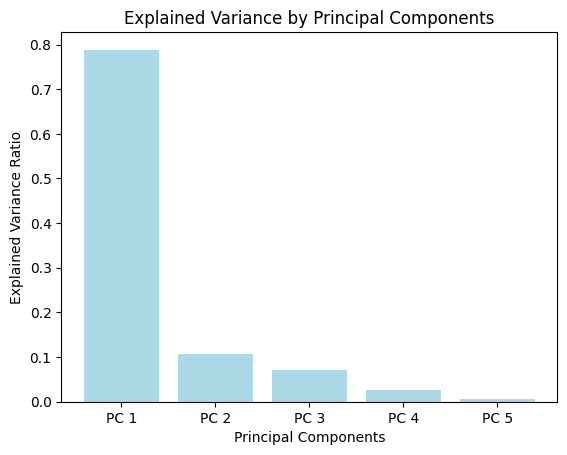

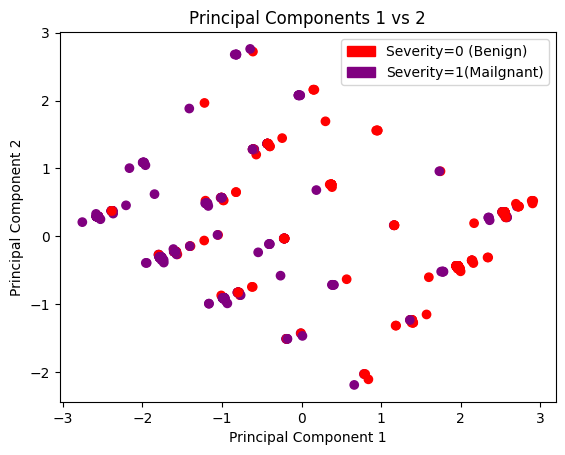

In [22]:
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches

# Same as 4.1
# Severity is the target variable, what we want to predict
# seperate the Severity column
X = cleaned_normalize.drop(columns=['Severity'])
y = cleaned_normalize['Severity']

# apply PCA with n_components=5
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

# create a DataFrame with PCA components
pca_df = pd.DataFrame(data=X_pca, columns=[f'Principal Component {i}' for i in range(1, 6)])
# print(pca_df)

# print the explained variance ratio
## the sum will be 1.0, meaning all the component explain total variance
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

# barplot the explained variance
plt.bar([f'PC {i}' for i in range(1, 6)],
        explained_variance, color='lightblue')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

# visualize the PCA result in the first two principal components
# because the first two components explain 89.95%  of the variance
# c stand for color, since there are only two condition of Severity(y) so set two color to easier visualize
colors = ['red' if label == 0 else 'purple' for label in y]
plt.scatter(x=pca_df['Principal Component 1'], y=pca_df['Principal Component 2'],
            c=colors)
plt.title('Principal Components 1 vs 2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# Create legend
Benign = mpatches.Patch(color='red', label='Severity=0 (Benign)')
Mailgnant = mpatches.Patch(color='purple', label='Severity=1(Mailgnant)')
# Add the legend to the plot
plt.legend(handles=[Benign, Mailgnant])
plt.show()


In [23]:
## same as previous, just make for the presentation
pca = PCA(n_components=2)

pcaData = pca.fit_transform(cleaned_normalize)

PCAfig = px.scatter(
    pcaData,
    x=0,
    y=1,
    title='PCA of Features',
    labels={'0': 'Principal Component 1', '1': 'Principal Component 2'}
)

PCAfig.show()

explained_variance = pca.explained_variance_ratio_
explained_variance_df = pd.DataFrame({
    'Component': ['Component 1', 'Component 2'],
    'Explained Variance': explained_variance
})

PCAVARfig = px.bar(['Component 1', 'Component 2'], explained_variance, color=0)
PCAVARfig.show()


## 4.3 SVD

     Component  Explained Variance
0  Component 1            0.460264
1  Component 2            0.384714


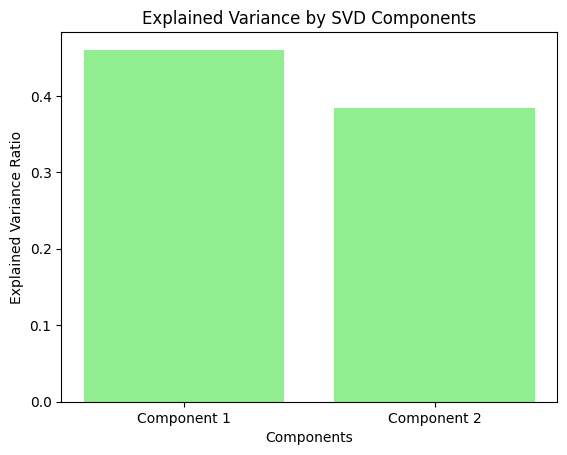

In [24]:
from sklearn.decomposition import TruncatedSVD

# Same as 4.1
# Severity is the target variable, what we want to predict
# seperate the Severity column
X = cleaned_normalize.drop(columns=['Severity'])
y = cleaned_normalize['Severity']

# apply Truncated SVD to reduce the dimensionality to 2 components
# the reason of n_components=2 is same as 4.2
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X)


# Show the explained variance ratio for each component
explained_variance = svd.explained_variance_ratio_
explained_variance_df = pd.DataFrame({
    'Component': ['Component 1', 'Component 2'],
    'Explained Variance': explained_variance
})
# Print table of explained variance
print(explained_variance_df)

# Bar plot to show the explained variance ratio of each component
plt.bar(['Component 1', 'Component 2'], explained_variance, color='lightgreen')
plt.title('Explained Variance by SVD Components')
plt.xlabel('Components')
plt.ylabel('Explained Variance Ratio')
plt.show()


In [25]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
TSVD = svd.fit_transform(cleaned_normalize)

TSVDfig = px.scatter(
    TSVD,
    x=0,
    y=1,
    title='Scatter Plot of First Two Principal Components after Truncated SVD',
    labels={'0': 'Principal Component 1', '1': 'Principal Component 2'}
)

TSVDfig.show()
